In [1]:
import pandas as pd

df = pd.read_csv('/content/Salary_dataset.csv')
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [2]:
print('First five rows:')
print(df.head())
print('\nLast five rows:')
print(df.tail())

First five rows:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Last five rows:
    Unnamed: 0  YearsExperience    Salary
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0


In [3]:
X = df[['YearsExperience']] # Input variable (features)
y = df['Salary'] # Output variable (target)

print("Input variables (X) head:")
print(X.head())
print("\nOutput variable (y) head:")
print(y.head())

Input variables (X) head:
   YearsExperience
0              1.2
1              1.4
2              1.6
3              2.1
4              2.3

Output variable (y) head:
0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64


In [4]:
X_numpy = X.values
y_numpy = y.values

print("X (NumPy array) head:")
print(X_numpy[:5])
print("X (NumPy array) shape:", X_numpy.shape)

print("\ny (NumPy array) head:")
print(y_numpy[:5])
print("y (NumPy array) shape:", y_numpy.shape)

X (NumPy array) head:
[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]
X (NumPy array) shape: (30, 1)

y (NumPy array) head:
[39344. 46206. 37732. 43526. 39892.]
y (NumPy array) shape: (30,)


In [5]:
y_numpy_reshaped = y_numpy.reshape(-1, 1)

print("X_numpy shape (already 2D):", X_numpy.shape)
print("y_numpy reshaped shape:", y_numpy_reshaped.shape)

# Optional: Display a few reshaped y values
print("\nReshaped y (NumPy array) head:")
print(y_numpy_reshaped[:5])

X_numpy shape (already 2D): (30, 1)
y_numpy reshaped shape: (30, 1)

Reshaped y (NumPy array) head:
[[39344.]
 [46206.]
 [37732.]
 [43526.]
 [39892.]]


In [6]:
slope = 0.0
intercept = 0.0

print(f"Initial slope: {slope}")
print(f"Initial intercept: {intercept}")

Initial slope: 0.0
Initial intercept: 0.0


In [7]:
y_pred = slope * X_numpy + intercept

print("Predicted y (y_pred) head with initial slope and intercept:")
print(y_pred[:5])

Predicted y (y_pred) head with initial slope and intercept:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [8]:
import numpy as np

def calculate_mse(y_actual, y_predicted):
    return np.mean((y_actual - y_predicted)**2)

mse = calculate_mse(y_numpy_reshaped, y_pred)
print(f"Initial Mean Squared Error (MSE): {mse}")

Initial Mean Squared Error (MSE): 6503107277.733334


In [9]:
learning_rate = 0.01
n_iterations = 10000

mse_history = []

for i in range(n_iterations):
    # Calculate predicted values
    y_pred = slope * X_numpy + intercept

    # Calculate error
    error = y_pred - y_numpy_reshaped

    # Calculate gradients
    d_slope = np.mean(X_numpy * error)
    d_intercept = np.mean(error)

    # Update parameters
    slope = slope - learning_rate * d_slope
    intercept = intercept - learning_rate * d_intercept

    # Calculate and store MSE
    current_mse = calculate_mse(y_numpy_reshaped, y_pred)
    mse_history.append(current_mse)

print(f"Final slope: {slope}")
print(f"Final intercept: {intercept}")
print(f"Final Mean Squared Error (MSE): {mse_history[-1]}")

Final slope: 9449.962325379338
Final intercept: 24848.203939785166
Final Mean Squared Error (MSE): 31270951.72228097


In [10]:
y_pred_final = slope * X_numpy + intercept

print("Predicted salaries (y_pred_final) head:")
print(y_pred_final[:5])

Predicted salaries (y_pred_final) head:
[[36188.15873024]
 [38078.15119532]
 [39968.14366039]
 [44693.12482308]
 [46583.11728816]]


In [11]:
final_mse = calculate_mse(y_numpy_reshaped, y_pred_final)
print(f"Final Mean Squared Error (MSE): {final_mse}")

Final Mean Squared Error (MSE): 31270951.722280975


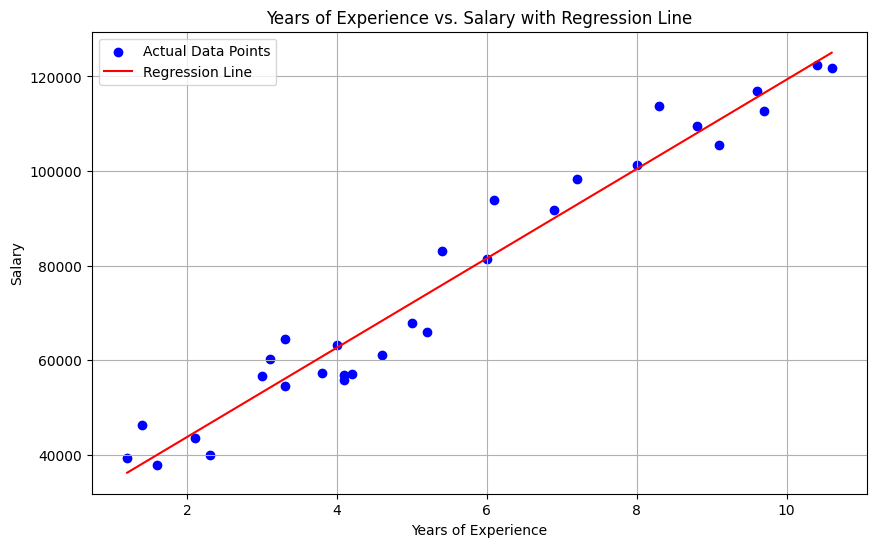

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_numpy, y_numpy_reshaped, color='blue', label='Actual Data Points')
plt.plot(X_numpy, y_pred_final, color='red', label='Regression Line')
plt.title('Years of Experience vs. Salary with Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()